# Titanic Competition 
The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
The datasets I will be using in this project are: gender_submission, test and train. 
The train dataset contains:
    - details of a portion of the passengers on board the titanic

The test dataset contains:
    - the details of the other passengers that were aboard the titanic
    
The gender_submission dataset contains:
    - The expected outcome of the project. Which is that all the women survived 
      and all the men aboard died

In [1]:
# Allows for the use of linear algebra
import numpy as np

# Allows for the use of data processing 
import pandas as pd

# This portion of code is specificly for Kaggle
'''import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

"import os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [2]:
# Loads the training data into a variable
training_Dataset = pd.read_csv('train.csv')
training_Dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Shows if any of the columns have missing values
training_Dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# Loads the test data into a variable
testing_Dataset = pd.read_csv('test.csv')
testing_Dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Shows if any of the columns have missing values
testing_Dataset.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


## Checking if the gender_submission prediction is accurate
Since the gender_submission table predicted that all the women survived, we have to identify if that assumption is accurate. So, now we am going to identify the percentage of women  and men who survived.

In [6]:
# Accesses the Sex and Survived columns in the training_Dataset table 
women_Survived = training_Dataset.loc[training_Dataset.Sex == 'female'] ["Survived"]

# adds all the rows up in both columns
# then finds the length of the of both columns and divides them
percentage_Rate_Women = sum(women_Survived)/len(women_Survived)
print(percentage_Rate_Women)

0.7420382165605095


In [7]:
# Accesses the Sex and Survived columns in the training_Dataset table 
men_Survived = training_Dataset.loc[training_Dataset.Sex == 'male'] ["Survived"]

# adds all the rows up in both columns
# then finds the length of the of both columns and divides them
percentage_Rate_men = sum(men_Survived)/len(men_Survived)
print(percentage_Rate_men)


0.18890814558058924


## Looking at how many passengers survived 

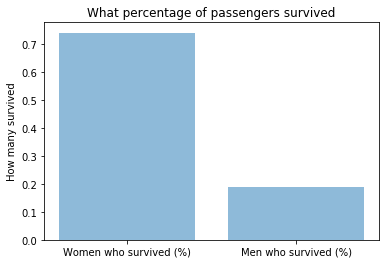

In [8]:
# Allows for the use of graphs
from matplotlib import pyplot as plt

# the title of each column
survived = ('Women who survived (%)', 'Men who survived (%)')
# Calculates the total amount of each variable to use for the y axis
y_Axis = np.arange(len(survived))
# Stores the values of each column
performance = [percentage_Rate_Women, percentage_Rate_men]

# Plots the bar chart
plt.bar(y_Axis, performance, align='center', alpha=0.5)
# adds the numbers on the y axis and the names of each column on the x axis
plt.xticks(y_Axis, survived)
# the title of the y axis
plt.ylabel('How many survived')
# adds the title of the bar chart to the top of the chart
plt.title('What percentage of passengers survived')

# displays the bar chart
plt.show()

As you can see, 74% of all female passengers on board the titanic survived and only a measly 18% of all male passengers survived. Which means that the gender_submission file was to some level correct, however, the submission file only came to it's conclusion due to it only predicting using 2 columns. Which, does not give an accurate representation of how many passengers survived. Due to the fact that the submission file, has left lots of open ended questions. Such as; how many passengers survived from each class or how much did each passenger pay for their ticket. Also, as you can see above in both datasets there are multiple missing values, which can hinder a model's predictive accuracy.

# A machine learning model to predict how many passengers actually survived based on mulitple features

In [11]:
# enables the model to adapt to continuous classification and depending on what it is fed (via parameters), 
# averages to improve the model's predictive accuracy and control overfitting
from sklearn.ensemble import RandomForestClassifier

# stores the data in the survived column to the y value
y = training_Dataset["Survived"]

# The deciding factors of who survived the titanic
feature_List = ['Pclass', 'Sex', 'SibSp', 'Parch']

# Both of the following lines convert the catagorical variables in each column* 
# into indicator variables**.
# (* Which are a type of variable that can take only a limited number of values.)
#(** Which are a type of variable that can only be a boolean value.)
X = pd.get_dummies(training_Dataset[feature_List])
X_Testing = pd.get_dummies(testing_Dataset[feature_List])

# n_estimators - chooses the number of trees in the forest, 
# max_depth - the maximum a tree can grow,
# random_state - controls the randomness of the samples going through the trees in the forest
titanic_Model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#fits the model
titanic_Model.fit(X, y)
# predicts the model
Predictive_Model = titanic_Model.predict(X_Testing)
 
# creates a new DataFrame that has two columns that store each id and their predicted survival rate
final_Output = pd.DataFrame({'PassengerId': testing_Dataset.PassengerId, 'Survived': Predictive_Model})
print(final_Output)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
